In [5]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pygmo as pg

import sys,os,time

def ACE(N, f, a_p, a_e):
    f = 2985.65-0.298193*N-4.87457*f-5911.40*a_p-71.6392*a_e+5.46662e-5*N**2+\
        0.00361169*f**2+3794.33*a_p**2+2.67002*a_e**2-3.12767e-5*N*f+\
        0.653511*N*a_p-0.0133361*N*a_e+3.04907*f*a_p+0.0835717*f*a_e
    return f

def SR(N, f, a_p, a_e):
    f = -8.97741-5.56111e-4*N+0.0430411*f+37.6783*a_p-0.0638444*a_e+\
        1.00000e-6*N**2-5.86667e-5*f**2-32.4444*a_p**2-0.0151556*a_e**2-5.16667e-6*N*f\
        -0.00768889*N*a_p+0.000119556*N*a_e+0.0145000*f*a_p-3.53333e-4*f*a_e
    return f

def MRR(N, f, a_p, a_e):
    f = 3048.30-1.4580*N-3.15*f-10665*a_p+51.3*a_e+0.00027*N**2-2.99038e-17*f**2+\
        6750*a_p**2+2.7*a_e**2-5.00000e-4*N*f+2.7*N*a_p-0.054*N*a_e+10*f*a_p+0.4*f*a_e
    return f

class mop_function:
    x_min = [1200, 220, 0.3, 5]
    x_max = [2200, 320, 0.5, 15]
    
    def __init__(self, dim=4, nobjs=3):
        self.dim = dim
        self.nobjs = nobjs
    
    def fitness(self, x):
        f_mrr = -MRR(*x)
        f_sr = SR(*x)
        f_ace = ACE(*x)
        return [f_mrr,f_sr,f_ace]
    
    def get_bounds(self):
        return (self.x_min,self.x_max)
    
    def get_nobj(self):
        return self.nobjs

prob = pg.problem(mop_function())
pop = pg.population(prob=prob, size=100, seed=1)
if 1:
    algo = pg.algorithm(pg.nsga2(gen=1000))
else:
    algo = pg.algorithm(pg.sga(gen=1000))

t_start = time.time()
pop = algo.evolve(pop)
t_used = time.time() - t_start

print(algo.get_name(), 'time:%.3fs'%(t_used,))

if 0:
    ax = pg.plot_non_dominated_fronts(pop.get_f())
    ax.set_xlabel('MRR')
    ax.set_ylabel('SR')
    ax.grid(True)


NSGA-II: time:3.104s


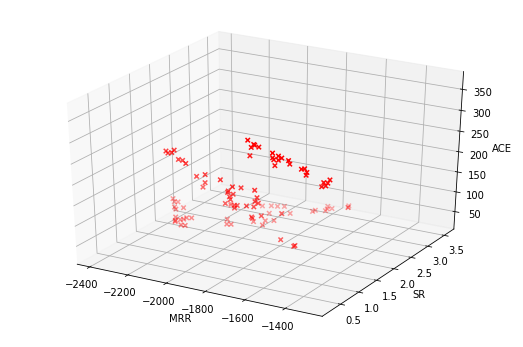

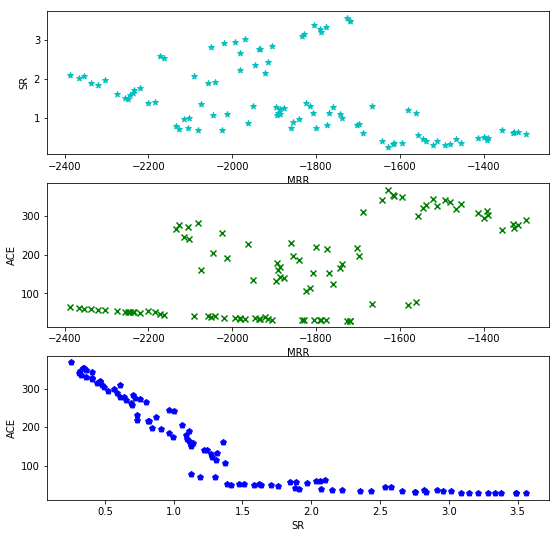

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

f = pop.get_f()

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(f[:,0], f[:,1], f[:,2], c='r', marker='x')
ax.set_xlabel('MRR')
ax.set_ylabel('SR')
ax.set_zlabel('ACE')

plt.show()

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(311)
ax.scatter(f[:,0], f[:,1], c='c', marker='*')
ax.set_xlabel('MRR')
ax.set_ylabel('SR')
#ax.set_zlabel('ACE')

ax = fig.add_subplot(312)
ax.scatter(f[:,0], f[:,2], c='g', marker='x')
ax.set_xlabel('MRR')
#ax.set_ylabel('SR')
ax.set_ylabel('ACE')

ax = fig.add_subplot(313)
ax.scatter(f[:,1], f[:,2], c='b', marker='p')
#ax.set_xlabel('MRR')
ax.set_xlabel('SR')
ax.set_ylabel('ACE')

plt.show()

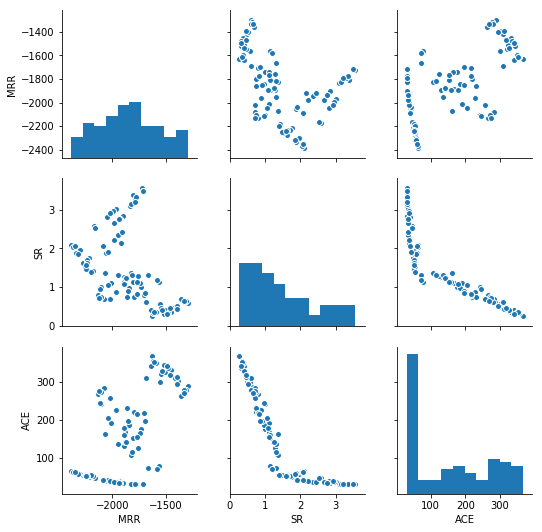

In [7]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(f, columns=['MRR', 'SR', 'ACE'])
#print(df)
sns.pairplot(df)

plt.show()

In [8]:
x = pop.get_x()
z = np.hstack((x,f))

df1 = pd.DataFrame(z, columns=['N', 'f', 'a_p', 'a_e','MRR', 'SR', 'ACE'])
#df1.to_excel('moo_result.xlsx', sheet_name='Sheet1')
print(df1)
#print(x)
#print(f)

              N           f       a_p        a_e          MRR        SR  \
0   1200.003266  220.000025  0.300000  14.999995 -1627.495794  0.251665   
1   1231.196059  319.999989  0.500000  11.485760 -1726.579082  3.557983   
2   1200.006238  319.999989  0.500000  14.999999 -2387.496961  2.099976   
3   1600.994320  220.804449  0.307675  14.940323 -1297.816025  0.588685   
4   1470.428908  220.440095  0.490627  14.998786 -1561.855918  1.128286   
5   1764.532061  319.979762  0.378699  14.914376 -1824.715509  1.374942   
6   1550.002632  223.983938  0.324015  14.978719 -1355.178251  0.693234   
7   1324.602667  319.993075  0.499927  14.821909 -2304.322630  1.967496   
8   1348.250447  227.602360  0.499962  14.998668 -1666.375751  1.301726   
9   1234.134633  225.860725  0.300018  14.935290 -1616.977328  0.344779   
10  1217.823816  319.982561  0.499999  13.912757 -2171.483081  2.577579   
11  1509.366699  224.509803  0.304912  14.998302 -1390.179610  0.492762   
12  1552.108102  319.9879